<h1 style="text-align:center;">Lecture 1</h1>

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import iqr

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

<h2 style="text-align:center;">Classification problem</h2>

In [5]:
drugs = pd.read_csv("drug200.csv")

In [6]:
printer = lambda: print(50 * "-")
print(drugs.describe())
printer()
print(drugs.info())
printer()
print(drugs.isna().sum())
printer()

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
--------------------------------------------------
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
------

### EDA

In [59]:
numerical = drugs[["Age", "Na_to_K", "Drug"]]
categorical = drugs.drop(["Age", "Na_to_K"], axis=1)
not_label = set(categorical) - {"Drug"}

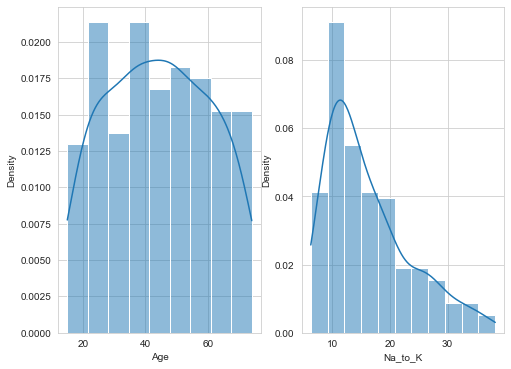

In [60]:
fig, ax = plt.subplots(1, 2)
for i in range(2):
    sns.histplot(data=numerical.iloc[:, i], ax=ax[i], stat="density", kde=True)
plt.show()

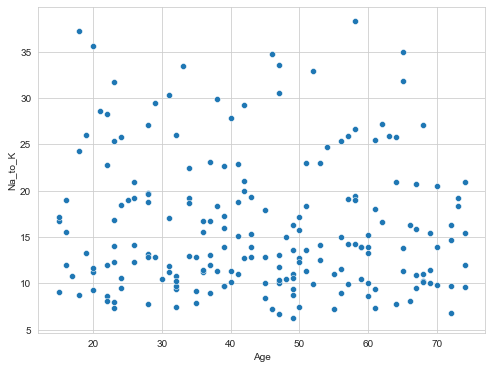

In [61]:
sns.scatterplot(data=numerical, x='Age', y="Na_to_K")
plt.show()

In [62]:
numerical.corr(method="pearson") # other methods: kendall, spearman

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


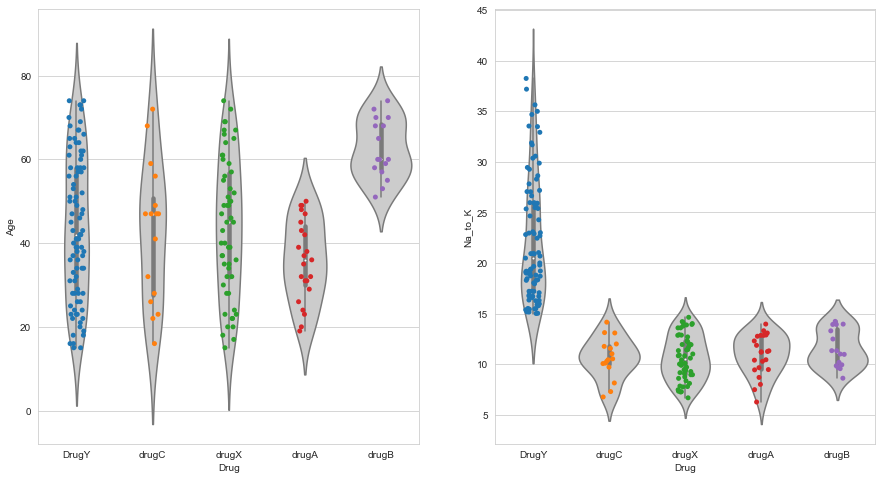

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
for (idx, colname) in zip([0, 1], numerical.columns):
    sns.violinplot(data=numerical, x='Drug', y=colname, ax=ax[idx], color=".8")
    sns.stripplot(data=numerical, x='Drug', y=colname, ax=ax[idx])
plt.show()

In [88]:
numerical.groupby("Drug").agg(["mean", "std", "median", iqr])

Age                             Na_to_K                     \
            mean        std median    iqr       mean       std   median   
Drug                                                                      
DrugY  43.747253  17.031731   42.0  29.50  22.374780  6.060195  20.4890   
drugA  35.869565   9.696786   36.0  14.00  10.918783  2.037642  11.2270   
drugB  62.500000   7.127412   60.0  10.75  11.524375  1.869919  11.1745   
drugC  42.500000  16.725230   47.0  23.25  10.633750  2.045009  10.4905   
drugX  44.018519  16.435685   45.0  24.75  10.650556  2.198091  10.5240   

                
           iqr  
Drug            
DrugY  8.75350  
drugA  3.24050  
drugB  3.53975  
drugC  1.84850  
drugX  3.28925

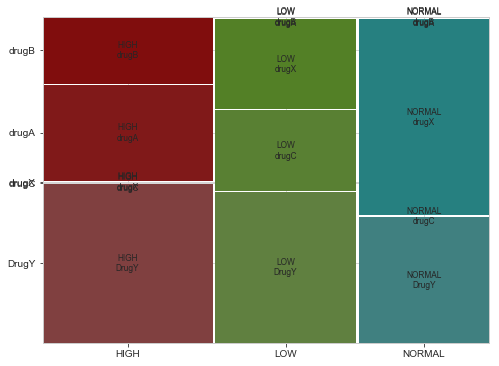

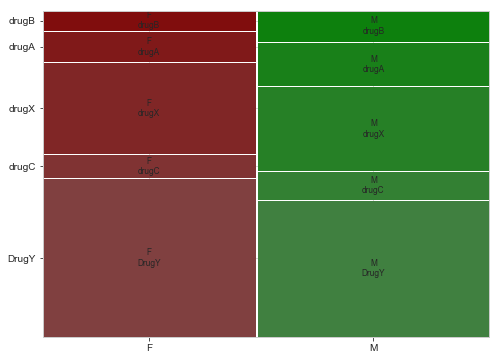

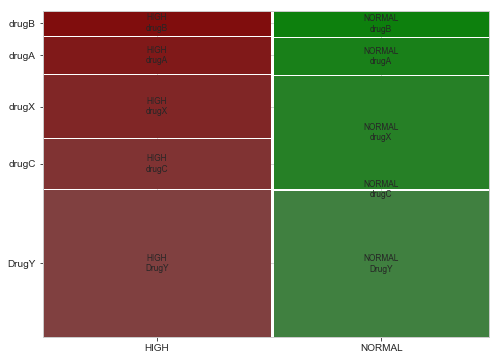

In [47]:
for i in not_label:
    mosaic(data=categorical, index=[i, "Drug"])
    plt.show()

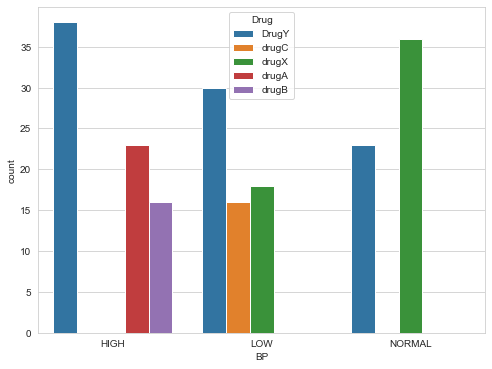

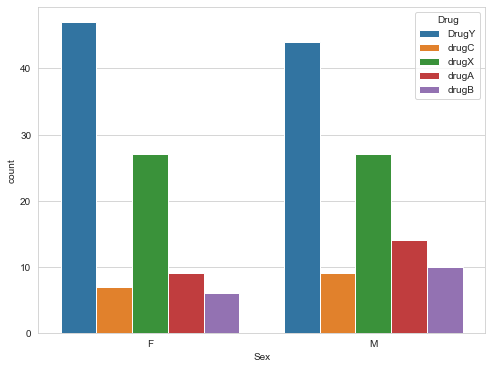

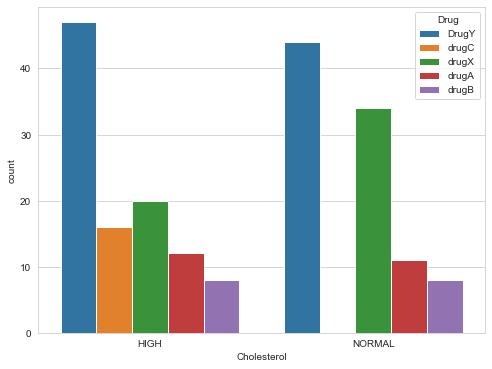

In [49]:
for i in not_label:
    sns.countplot(data=categorical, x=i, hue='Drug')
    plt.show()

### Modeling